Метрики для логистической регрессии:
Accuracy: 0.6909
Precision: 0.7812
Recall: 0.7143
F1-score: 0.7463


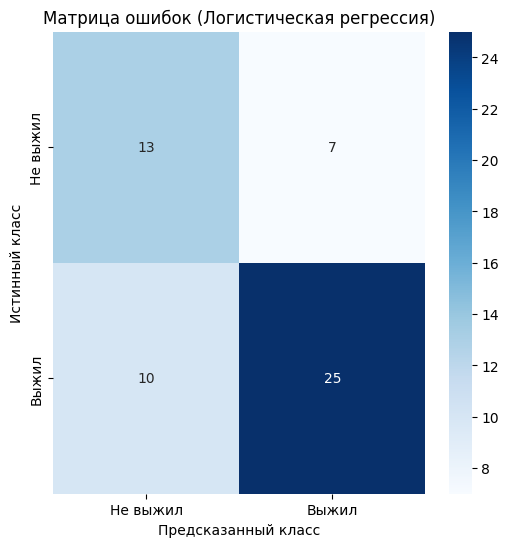

<Figure size 800x600 with 0 Axes>

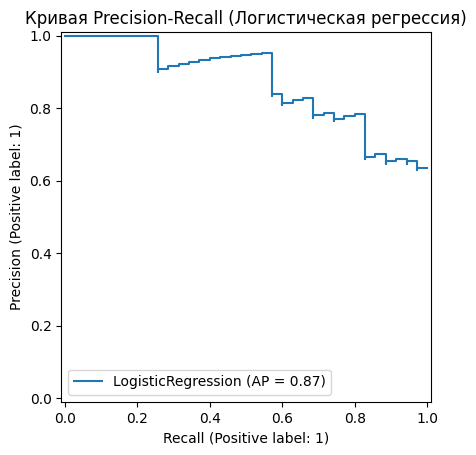

<Figure size 800x600 with 0 Axes>

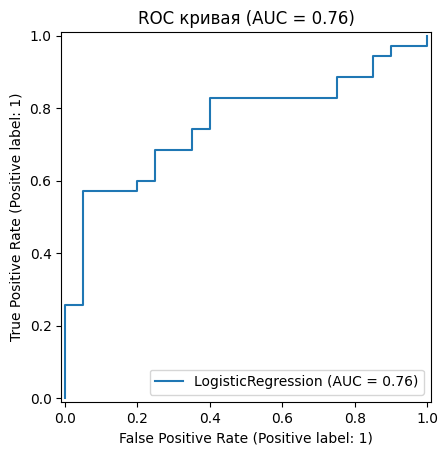


Метрики для SVM:
Accuracy: 0.6364
Precision: 0.6364
Recall: 1.0000
F1-score: 0.7778

Метрики для KNN:
Accuracy: 0.6545
Precision: 0.6739
Recall: 0.8857
F1-score: 0.7654


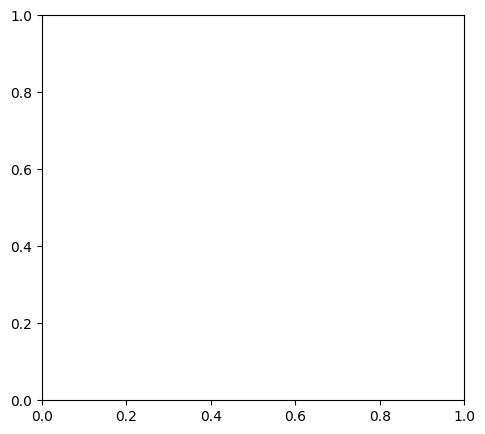

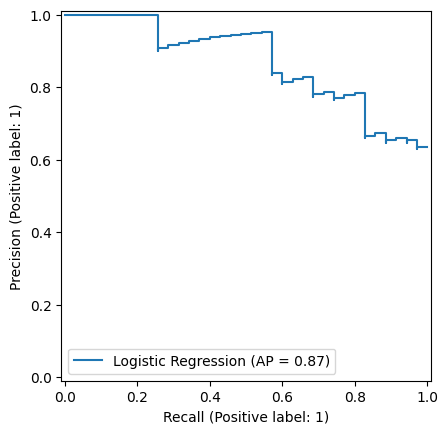

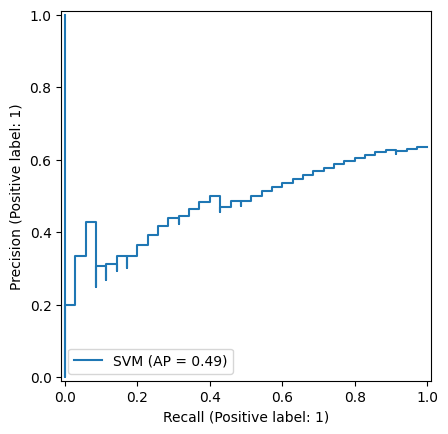

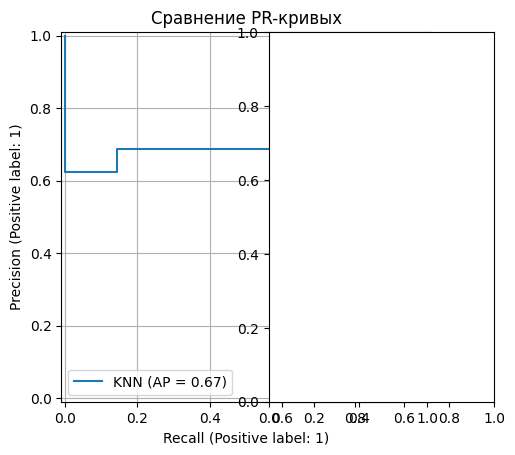

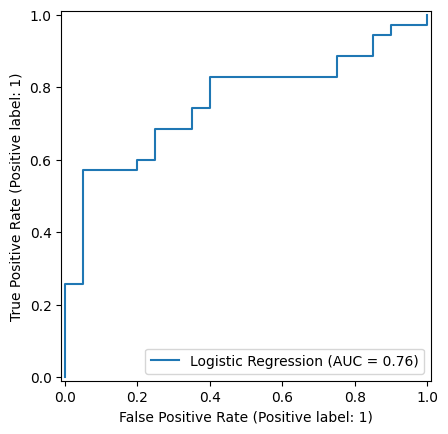

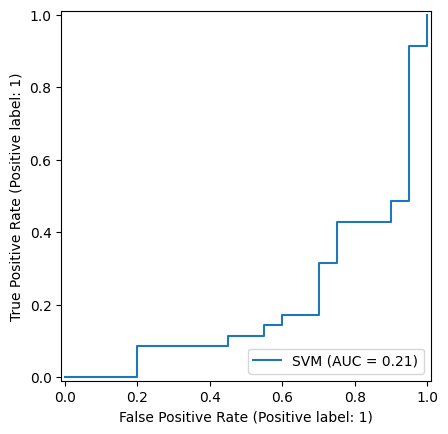

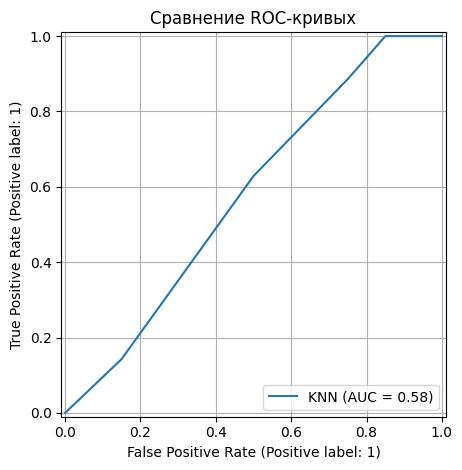


Выводы:
1. Логистическая регрессия показала следующие метрики:
   - Accuracy: 0.6909
   - F1-score: 0.7463
   - AUC-ROC: 0.7571

2. Сравнение моделей:
Наилучшая модель по F1-score: SVM (F1 = 0.7778)


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, precision_recall_curve,
                            roc_curve, auc, PrecisionRecallDisplay, RocCurveDisplay)


data = pd.read_csv('Titanic.csv')

# Часть 1
def preprocess_data(df):
    df = df.dropna()
    df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
    df = df.drop(columns=['PassengerId'])
    return df

data_cleaned = preprocess_data(data)


X = data_cleaned.drop(columns=['Survived'])
y = data_cleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]
print("Метрики для логистической регрессии:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Не выжил', 'Выжил'],
            yticklabels=['Не выжил', 'Выжил'])
plt.title('Матрица ошибок (Логистическая регрессия)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

# Кривая PR
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay.from_estimator(lr_model, X_test, y_test)
plt.title('Кривая Precision-Recall (Логистическая регрессия)')
plt.show()

# Кривая ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)
plt.title(f'ROC кривая (AUC = {roc_auc:.2f})')
plt.show()

# Часть 2

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Метрики для SVM
print("\nМетрики для SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_svm):.4f}")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Метрики для KNN
print("\nМетрики для KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn):.4f}")
plt.figure(figsize=(12, 5))

# Кривые PR
plt.subplot(1, 2, 1)
PrecisionRecallDisplay.from_estimator(lr_model, X_test, y_test, name='Logistic Regression')
PrecisionRecallDisplay.from_estimator(svm_model, X_test, y_test, name='SVM')
PrecisionRecallDisplay.from_estimator(knn_model, X_test, y_test, name='KNN')
plt.title('Сравнение PR-кривых')
plt.grid()

# Кривые ROC
plt.subplot(1, 2, 2)
RocCurveDisplay.from_estimator(lr_model, X_test, y_test, name='Logistic Regression')
RocCurveDisplay.from_estimator(svm_model, X_test, y_test, name='SVM')
RocCurveDisplay.from_estimator(knn_model, X_test, y_test, name='KNN')
plt.title('Сравнение ROC-кривых')
plt.grid()
plt.tight_layout()
plt.show()


print("\nВыводы:")
print("1. Логистическая регрессия показала следующие метрики:")
print(f"   - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"   - F1-score: {f1_score(y_test, y_pred):.4f}")
print(f"   - AUC-ROC: {roc_auc:.4f}")

print("\n2. Сравнение моделей:")
models = {
    'Logistic Regression': y_pred,
    'SVM': y_pred_svm,
    'KNN': y_pred_knn
}

best_model = max(models.keys(), key=lambda x: f1_score(y_test, models[x]))
print(f"Наилучшая модель по F1-score: {best_model} (F1 = {f1_score(y_test, models[best_model]):.4f})")
